## Punto 3 

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from scipy import signal


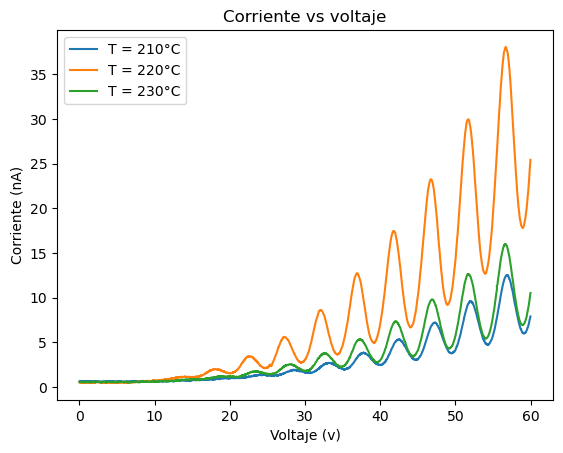

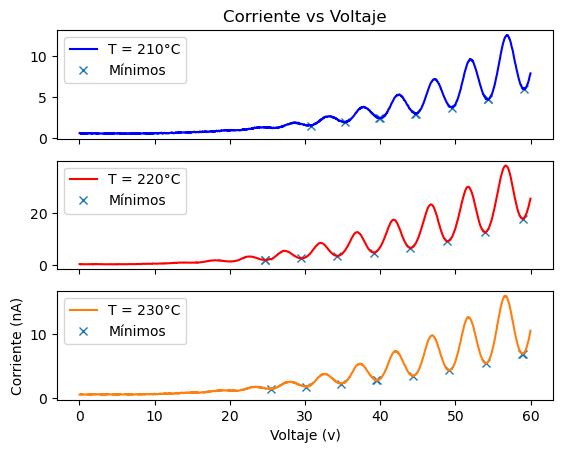

"\nt_230 = ax.plot(df_datosPunto7_210['U1[V]'][1:], isZero,label = 'T = 210°C')"

In [127]:
#Ubicación de la base de datos
datosPunto2_210 = './datosPunto2/datos2_210.csv'
datosPunto2_220 = './datosPunto2/datos2_220.csv'
datosPunto2_230 = './datosPunto2/datos2_230.csv'
#Cargar los datos
df_datosPunto7_210 = pd.read_csv(datosPunto2_210, sep=',')
df_datosPunto7_220 = pd.read_csv(datosPunto2_220, sep=',')
df_datosPunto7_230 = pd.read_csv(datosPunto2_230, sep=',')

#print(df_datosPunto7_210)
#ax.errorbar(B,Omega, xerr = delta_B, yerr=delta_Omega, fmt='o')
fig = plt.figure()
zx = fig.add_subplot()
t_210, = zx.plot(df_datosPunto7_210['U1[V]'], df_datosPunto7_210['IA[nA]'],label = 'T = 210°C')
t_220, = zx.plot(df_datosPunto7_220['U1[V]'], df_datosPunto7_220['IA[nA]'],label = 'T = 220°C')
t_230, = zx.plot(df_datosPunto7_230['U1[V]'], df_datosPunto7_230['IA[nA]'],label = 'T = 230°C')

plt.title("Corriente vs voltaje")
plt.xlabel("Voltaje (v)")
plt.ylabel('Corriente (nA)')

zx.legend([t_210,t_220,t_230], [t_210.get_label(), t_220.get_label(), t_230.get_label()], loc="upper left")




def getMinimums(data, prominence): 
    peaks, _ = find_peaks(-1*data['IA[nA]'],prominence=prominence)
    return peaks

fig, (ax1, ax2,ax3) = plt.subplots(3, sharex=True)



min210Index = getMinimums(df_datosPunto7_210, 0.15)
min210, = ax1.plot(df_datosPunto7_210.iloc[min210Index]['U1[V]'],df_datosPunto7_210.iloc[min210Index]['IA[nA]'], "x", label = "Mínimos")
t_210,  = ax1.plot(df_datosPunto7_210['U1[V]'], df_datosPunto7_210['IA[nA]'],c = "blue", label = "T = 210°C")
ax1.set_title('Corriente vs Voltaje')
ax1.legend([t_210,min210], [t_210.get_label(), min210.get_label()], loc="upper left")

min220Index = getMinimums(df_datosPunto7_220, 0.5)
min220,= ax2.plot(df_datosPunto7_220.iloc[min220Index]['U1[V]'],df_datosPunto7_220.iloc[min220Index]['IA[nA]'], "x", label = "Mínimos")
t_220,= ax2.plot(df_datosPunto7_220['U1[V]'], df_datosPunto7_220['IA[nA]'],c = "red", label = "T = 220°C")
ax2.legend([t_220,min220], [t_220.get_label(), min220.get_label()], loc="upper left")
plt.xlabel("Voltaje (v)")
plt.ylabel('Corriente (nA)')

min230Index = getMinimums(df_datosPunto7_230, 0.15)
min230, = ax3.plot(df_datosPunto7_230.iloc[min230Index]['U1[V]'],df_datosPunto7_230.iloc[min230Index]['IA[nA]'], "x", label = "Mínimos")
t_230, = ax3.plot(df_datosPunto7_230['U1[V]'], df_datosPunto7_230['IA[nA]'],label = "T = 230°C")

ax3.legend([t_230,min230], [t_230.get_label(), min230.get_label()], loc="upper left")
plt.show()




"""t_230 = ax.scatter(minVoltage, minCurrent,label = 'T = 210°C')


minVoltage, minCurrent = get_minimums(df_datosPunto7_220)
print(len(minVoltage),len(minCurrent))

t_230 = ax.scatter(minVoltage, minCurrent,label = 'T = 220°C')



minVoltage, minCurrent = get_minimums(df_datosPunto7_230)
print(len(minVoltage),len(minCurrent))"""
"""
t_230 = ax.plot(df_datosPunto7_210['U1[V]'][1:], isZero,label = 'T = 210°C')"""


   index  U1[V]  IA[nA]
0      0  30.86    1.55
1      1  35.28    1.94
2      3  39.99    2.45
3      5  44.78    3.00
4      6  49.49    3.74
5      8  54.38    4.72
6      9  59.09    5.98    index  U1[V]  IA[nA]
0      0  30.86    1.55
1      1  35.28    1.94
2      3  39.99    2.45
3      5  44.78    3.00
4      6  49.49    3.74
5      8  54.38    4.72
6      9  59.09    5.98    index  U1[V]  IA[nA]
0      0  25.47    1.40
1      1  30.08    1.75
2      2  34.84    2.23
3      4  39.58    2.75
4      5  44.34    3.39
5      6  49.20    4.29
6      7  54.01    5.39
7      9  58.94    6.92


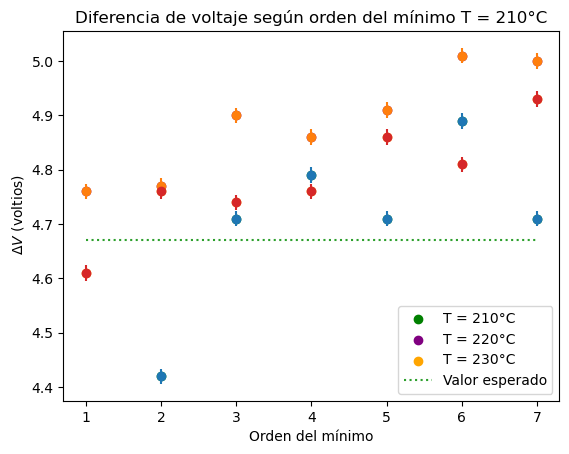

In [128]:
# Ya tenemos los mínimos, ahora encontramos diferencias entre estos mínimos
min210 = df_datosPunto7_210.iloc[min210Index]
min220= df_datosPunto7_220.iloc[min220Index]
min230 = df_datosPunto7_230.iloc[min230Index]


min210.reset_index(drop=True, inplace=True)
min220.reset_index(drop=True, inplace=True)
min230.reset_index(drop=True, inplace=True)

def getOneMinimum(minimums): 
    list = []
    for i in range(0, len(minimums)-1):
        #print("Hey I am ", i ,minimums.iloc[i]['IA[nA]'],minimums.iloc[i+1]['IA[nA]'] )
        if minimums.iloc[i]['IA[nA]'] == minimums.iloc[i+1]['IA[nA]'] : 
            #or(  minimums.iloc[i+1]['U1[V]']-0.1<minimums.iloc[i]['U1[V]'] < minimums.iloc[i+1]['U1[V]']+0.1)
            list.append(i)
    minimums = minimums.drop(index = list)
    return minimums.reset_index()

realmin210 = getOneMinimum(min210)
realmin220 = getOneMinimum(min220)
realmin230 = getOneMinimum(min230)

print(realmin210,realmin210,realmin230)
"""print(realmin210)
print(realmin220)
print(realmin230)"""

#Reasignar indices para tener orden en dataframe


#print(min210)

def getDifferences(minimums):
    DeltaDif = []
    for i in range(1, len(minimums)): 
        #print(minimums.iloc[i]['U1[V]']-minimums.iloc[i-1]['U1[V]'])
        DeltaDif.append(minimums.iloc[i]['U1[V]']-minimums.iloc[i-1]['U1[V]'])

    return np.array(DeltaDif)


deltaMin210 = getDifferences(realmin210)
numMin210 = [2,3,4,5,6,7]
excpected = np.ones_like(numMin210)


deltaV_error = 0.01*2**(1/2)


fig, ax = plt.subplots()
t210 = ax.scatter(numMin210,deltaMin210,c = 'green', label = 'T = 210°C' )

ax.errorbar(numMin210,deltaMin210, yerr=np.ones_like(numMin210)*deltaV_error, fmt='o')

ax.set_title('Diferencia de voltaje según orden del mínimo T = 210°C')
plt.ylabel(r' $\Delta V$ (voltios)')
plt.xlabel('Orden del mínimo')

deltaMin220 = getDifferences(realmin220)
numMin220 = [1,2,3,4,5,6,7]
excpected = np.ones_like(numMin220)

t220 =ax.scatter(numMin220,deltaMin220, c = 'purple',label = 'T = 220°C' )
ax.errorbar(numMin220,deltaMin220, yerr=np.ones_like(numMin220)*deltaV_error, fmt='o')

deltaMin230 = getDifferences(realmin230)
numMin230 = [1,2,3,4,5,6,7]
excpected = np.ones_like(numMin220)
expec, =ax.plot(numMin230, excpected*4.67, linestyle='dotted', label = "Valor esperado")
t230 =ax.scatter(numMin230,deltaMin230, c = 'orange',label = 'T = 230°C' )
ax.errorbar(numMin230,deltaMin230, yerr=np.ones_like(numMin230)*deltaV_error, fmt='o')


ax.legend([t210,t220,t230, expec], [t210.get_label(), t220.get_label(), t230.get_label(),expec.get_label()], loc="lower right")
plt.show()

[4.705000000000001, 4.887142857142856, 4.781428571428571]
[0.0057735  0.00534522 0.00534522]


Text(0.5, 0, 'Orden del mínimo')

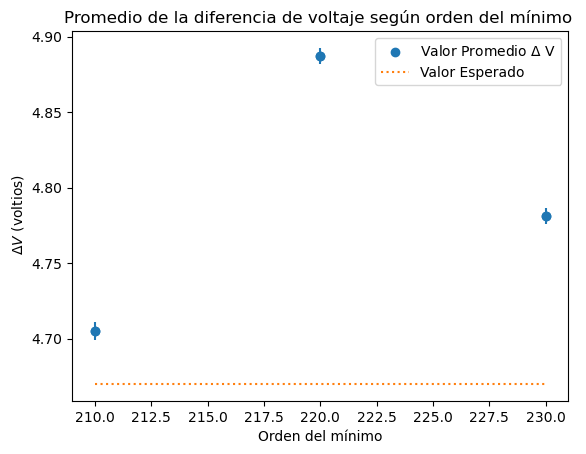

In [129]:
# Obtenemos promedio y vemos como se comporta en torno al valor esperado 
t210Mean = deltaMin210.mean()
t220Mean = deltaMin220.mean()
t230Mean = deltaMin230.mean()

t = [210,220,230]
means = [t210Mean,t220Mean,t230Mean]
print(means)

meanDeltaV_error210 = deltaV_error/(len(numMin210)**(1/2))
meanDeltaV_error220 = deltaV_error/(len(numMin220)**(1/2))
meanDeltaV_error230 = deltaV_error/(len(numMin230)**(1/2))

meanDeltaV_errorArray = np.array([meanDeltaV_error210,meanDeltaV_error220,meanDeltaV_error230])

print(meanDeltaV_errorArray)
fig, bx = plt.subplots()
vMeans =bx.scatter(t,means, label = r'Valor Promedio $\Delta$ V')
bx.errorbar(t,means, yerr=meanDeltaV_errorArray, fmt='o')

expected = np.ones_like(t)

real,  =bx.plot(t,expected*4.67,linestyle='dotted', label = r'Valor Esperado')
bx.legend([vMeans,real], [vMeans.get_label(), real.get_label()], loc="upper right")
bx.set_title('Promedio de la diferencia de voltaje según orden del mínimo ')

plt.ylabel(r' $\Delta V$ (voltios)')
plt.xlabel('Orden del mínimo')


# Punto 5

      Voltage U1  Corriente IA
0           0.02          0.69
1           0.04          0.69
2           0.07          0.66
3           0.09          0.67
4           0.12          0.67
...          ...           ...
2452       59.90          5.07
2453       59.92          5.11
2454       59.95          5.15
2455       59.97          5.21
2456       59.99          5.22

[2457 rows x 2 columns]


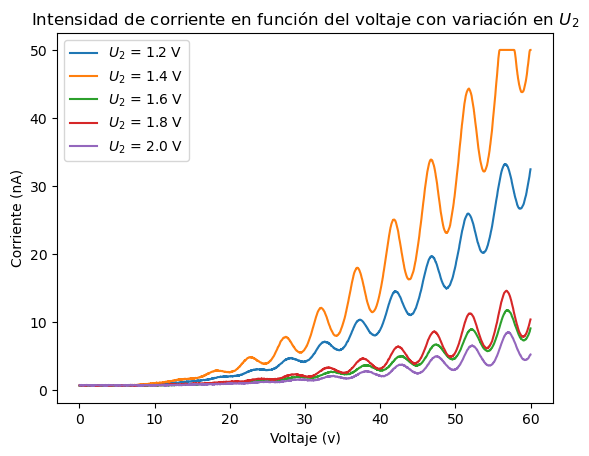

In [130]:
#Ubicación de la base de datos
datos_U2_1_2 = './datosPunto5/punto3_1,2V.csv'
datos_U2_1_4 = './datosPunto5/punto3_1,4V.csv'
datos_U2_1_6 = './datosPunto5/punto3_1,6V.csv'
datos_U2_1_8 = './datosPunto5/punto3_1,8V.csv'
datos_U2_2_0= './datosPunto5/punto3_2,0V.csv'
#Cargar los datos
df_datos_U2_1_2 = pd.read_csv(datos_U2_1_2, sep=',')
df_datos_U2_1_4 = pd.read_csv(datos_U2_1_4, sep=',')
df_datos_U2_1_6 = pd.read_csv(datos_U2_1_6, sep=',')
df_datos_U2_1_8 = pd.read_csv(datos_U2_1_8, sep=',')
df_datos_U2_2_0 = pd.read_csv(datos_U2_2_0, sep=',')

"""print(df_datos_U2_1_2)
print(df_datos_U2_1_4)
print(df_datos_U2_1_6)
print(df_datos_U2_1_8)"""
print(df_datos_U2_2_0)

fig, cx = plt.subplots()
u2_1_2, = cx.plot(df_datos_U2_1_2['Voltage U1'], df_datos_U2_1_2['Corriente IA'], label = r'$U_2$ = 1.2 V')
u2_1_4, =cx.plot(df_datos_U2_1_4['Voltage U1'], df_datos_U2_1_4['Corriente IA'],label = r'$U_2$ = 1.4 V')
u2_1_6, =cx.plot(df_datos_U2_1_6['Voltage U1'], df_datos_U2_1_6['Corriente IA'],label = r'$U_2$ = 1.6 V')
u2_1_8, =cx.plot(df_datos_U2_1_8['Voltage U1'], df_datos_U2_1_8['Corriente IA'],label = r'$U_2$ = 1.8 V')
u2_2_0, =cx.plot(df_datos_U2_2_0['Voltage U1'], df_datos_U2_2_0['Corriente IA'],label = r'$U_2$ = 2.0 V')

cx.set_title(r'Intensidad de corriente en función del voltaje con variación en $U_2$')
plt.xlabel("Voltaje (v)")
plt.ylabel('Corriente (nA)')
cx.legend([u2_1_2,u2_1_4,u2_1_6, u2_1_8, u2_2_0], [u2_1_2.get_label(), u2_1_4.get_label(), u2_1_6.get_label(),u2_1_8.get_label(),u2_2_0.get_label() ], loc="upper left")

plt.show()

# Punto 6


      Voltage U1  Corriente IA
0           0.02          0.69
1           0.04          0.69
2           0.07          0.66
3           0.09          0.67
4           0.12          0.67
...          ...           ...
2452       59.90          5.07
2453       59.92          5.11
2454       59.95          5.15
2455       59.97          5.21
2456       59.99          5.22

[2457 rows x 2 columns]


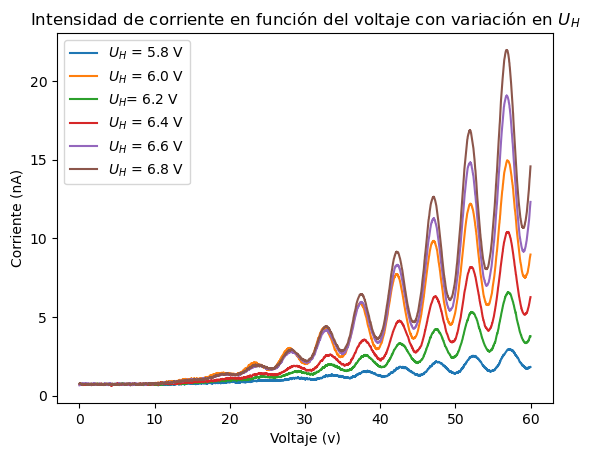

In [131]:
#Ubicación de la base de datos
datos_UH_5_8 = './datosPunto6/punto6_5,8V.csv'
datos_UH_6_0 = './datosPunto6/punto6_6,0V.csv'
datos_UH_6_2 = './datosPunto6/punto6_6,2V.csv'
datos_UH_6_4 = './datosPunto6/punto6_6,4V.csv'
datos_UH_6_6= './datosPunto6/punto6_6,6V.csv'
datos_UH_6_8= './datosPunto6/punto6_6,8V.csv'
#Cargar los datos
df_datos_UH_5_8= pd.read_csv(datos_UH_5_8, sep=',')
df_datos_UH_6_0 = pd.read_csv(datos_UH_6_0, sep=',')
df_datos_UH_6_2 = pd.read_csv(datos_UH_6_2, sep=',')
df_datos_UH_6_4 = pd.read_csv(datos_UH_6_4, sep=',')
df_datos_UH_6_6 = pd.read_csv(datos_UH_6_6, sep=',')
df_datos_UH_6_8 = pd.read_csv(datos_UH_6_8, sep=',')

"""print(df_datos_U2_1_2)
print(df_datos_U2_1_4)
print(df_datos_U2_1_6)
print(df_datos_U2_1_8)"""
print(df_datos_U2_2_0)

fig, dx = plt.subplots()
UH_5_8, = dx.plot(df_datos_UH_5_8['Voltage U1'], df_datos_UH_5_8['Corriente IA'], label = r'$U_H$ = 5.8 V')
UH_6_0, =dx.plot(df_datos_UH_6_0['Voltage U1'], df_datos_UH_6_0['Corriente IA'],label = r'$U_H$ = 6.0 V')
UH_6_2, =dx.plot(df_datos_UH_6_2['Voltage U1'], df_datos_UH_6_2['Corriente IA'],label = r'$U_H$= 6.2 V')
UH_6_4, =dx.plot(df_datos_UH_6_4['Voltage U1'], df_datos_UH_6_4['Corriente IA'],label = r'$U_H$ = 6.4 V')
UH_6_6, =dx.plot(df_datos_UH_6_6['Voltage U1'], df_datos_UH_6_6['Corriente IA'],label = r'$U_H$ = 6.6 V')
UH_6_8, =dx.plot(df_datos_UH_6_8['Voltage U1'], df_datos_UH_6_8['Corriente IA'],label = r'$U_H$ = 6.8 V')

dx.set_title(r'Intensidad de corriente en función del voltaje con variación en $U_H$')
plt.xlabel("Voltaje (v)")
plt.ylabel('Corriente (nA)')
dx.legend([UH_5_8,UH_6_0,UH_6_2, UH_6_4, UH_6_6,UH_6_8], [UH_5_8.get_label(), UH_6_0.get_label(), UH_6_2.get_label(),UH_6_4.get_label(),UH_6_6.get_label(),UH_6_8.get_label() ], loc="upper left")

plt.show()

# Punto 7

[2, 3, 4, 5, 6, 7] [4.42 4.71 4.79 4.71 4.89 4.71]
[0.05457143 4.45942855] [0.03176572 0.15289402]
[0.04321428 4.71428572] [0.00699672 0.03129028]
[0.04214285 4.61285715] [0.0090068  0.04027964]


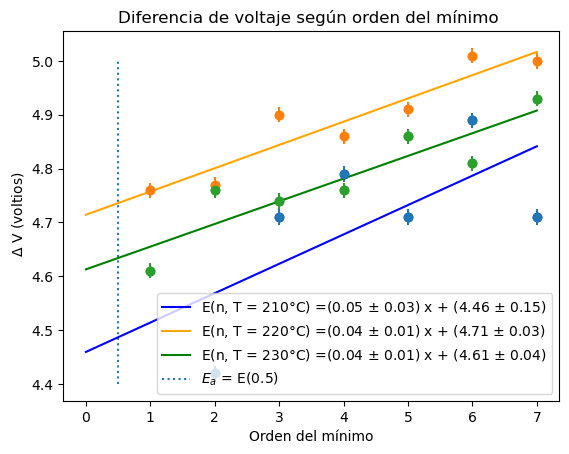

In [132]:
# Scipy -> Falta hacer regresión lineal :0

def linear(x,m,b): 
    return m*x+b

numMin210 = [2,3,4,5,6,7]
numMin220 = [1,2,3,4,5,6,7]
numMin230 = [1,2,3,4,5,6,7]

p0 = np.array([0.04, 4.67])
print(numMin210,deltaMin210)
sol210,cov210= curve_fit(linear, numMin210,deltaMin210, p0)

errores210 = np.sqrt(np.diag(cov210))
#print(cov[0])

m = sol210[0]

delta_m = cov210[0][0]

print(sol210, errores210)
#######################################################
p0 = np.array([0.04, 4.67])
sol220,cov220= curve_fit(linear, numMin220,deltaMin220, p0)

errores220 = np.sqrt(np.diag(cov220))
#print(cov[0])

m = sol220[0]

delta_m = cov220[0][0]

print(sol220, errores220)

###################################################################
p0 = np.array([0.04, 4.67])
sol230,cov230= curve_fit(linear, numMin230,deltaMin230, p0)

errores230 = np.sqrt(np.diag(cov230))
#print(cov[0])

m = sol230[0]

delta_m = cov230[0][0]

print(sol230, errores230)

fig, ax = plt.subplots()

t210 = ax.scatter(numMin210,deltaMin210,c = 'blue', label = 'T = 210°C' )
ax.errorbar(numMin210,deltaMin210, yerr=np.ones_like(numMin210)*deltaV_error, fmt='o')


ax.set_title('Diferencia de voltaje según orden del mínimo ')
plt.ylabel(r' $\Delta$ V (voltios)')
plt.xlabel('Orden del mínimo')


t220 =ax.scatter(numMin220,deltaMin220, c = 'orange',label = 'T = 220°C' )
ax.errorbar(numMin220,deltaMin220, yerr=np.ones_like(numMin220)*deltaV_error, fmt='o')

deltaMin230 = getDifferences(realmin230)
numMin230 = [1,2,3,4,5,6,7]
excpected = np.ones_like(numMin220)
expec =ax.vlines(0.5, 4.4,5,linestyle='dotted', label = r"$E_a$ = E(0.5)")
t230 =ax.scatter(numMin230,deltaMin230, c = 'green',label = 'T = 230°C' )
ax.errorbar(numMin230,deltaMin230, yerr=np.ones_like(numMin230)*deltaV_error, fmt='o')




numMin210 = [0,1,2,3,4,5,6,7]
numMin220 = [0,1,2,3,4,5,6,7]
numMin230 = [0,1,2,3,4,5,6,7]

a210, = ax.plot(numMin210,linear(np.array(numMin210), sol210[0], sol210[1]),c = 'blue', label = 'E(n, T = 210°C) =({}'.format(round(sol210[0],2)) +r' $\pm$ ' +str(round(errores210[0],2)) + ') x + ('+str(round(sol210[1],2))+r' $\pm$ '+  str(round(errores210[1],2))+')')

a220, = ax.plot(numMin220,linear(np.array(numMin220), sol220[0], sol220[1]),c = 'orange', label = 'E(n, T = 220°C) =({}'.format(round(sol220[0],2)) +r' $\pm$ ' +str(round(errores220[0],2)) + ') x + ('+str(round(sol220[1],2))+r' $\pm$ '+  str(round(errores220[1],2))+')')
a230, = ax.plot(numMin230,linear(np.array(numMin230), sol230[0], sol230[1]),c = 'green', label =  'E(n, T = 230°C) =({}'.format(round(sol230[0],2)) +r' $\pm$ ' +str(round(errores230[0],2)) + ') x + ('+str(round(sol230[1],2))+r' $\pm$ '+  str(round(errores230[1],2))+')')





ax.legend([a210,a220,a230, expec], [a210.get_label(), a220.get_label(), a230.get_label(),expec.get_label()], loc="lower right")
plt.show()

6 6


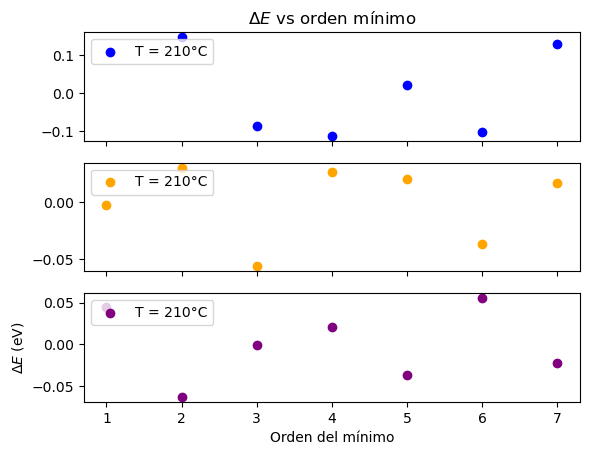

In [137]:
#Residuales
fig, (ax1, ax2,ax3) = plt.subplots(3, sharex=True)
numMin210 = [2,3,4,5,6,7]
numMin220 = [1,2,3,4,5,6,7]
numMin230 = [1,2,3,4,5,6,7]

print(len(linear(np.array(numMin210), sol210[0], sol210[1])), len(deltaMin210))
t_210  = ax1.scatter(numMin210, linear(np.array(numMin210), sol210[0], sol210[1])-deltaMin210,c = "blue", label = "T = 210°C")
ax1.set_title(r'$\Delta E$ vs orden mínimo')
ax1.legend([t_210], [t_210.get_label()], loc="upper left")


t_220= ax2.scatter(numMin220, linear(np.array(numMin220), sol220[0], sol220[1])-deltaMin220,c = "orange", label = "T = 210°C")
ax2.legend([t_220], [t_220.get_label()], loc="upper left")
plt.xlabel('Orden del mínimo')
plt.ylabel(r'$\Delta E$ (eV)')


t_230 = ax3.scatter(numMin230, linear(np.array(numMin230), sol230[0], sol230[1])-deltaMin230,c = "purple", label = "T = 210°C")

ax3.legend([t_230], [t_230.get_label()], loc="upper left")
plt.show()


In [134]:

# Encontramos E_a evaluando en n = 0.5
#T = 210
Ea_210 = linear(0.5, sol210[0], sol210[1])
errorEa_210 = ((Ea_210*errores210[0])**(2)+(errores210[1])**(2))**(1/2)

#T = 220
Ea_220 = linear(0.5, sol220[0], sol220[1])
errorEa_220 = ((Ea_220*errores220[0])**(2)+(errores220[1])**(2))**(1/2)

#T = 230
Ea_230 = linear(0.5, sol230[0], sol230[1])
errorEa_230 = ((Ea_230*errores230[0])**(2)+(errores230[1])**(2))**(1/2)


print(round(Ea_210,2),errorEa_210)
print(Ea_220,errorEa_220)
print(Ea_230,errorEa_230)



4.49 0.20902055412381113
4.735892862068861 0.045574744549798665
4.6339285803331185 0.058003581294563754


0.0007297737031959744
0.03176572126703389 0.006996719586670574 0.009006800501770698
Los valores para el camnio libre medio [729.7737032  547.49064937 545.6647082 ] Con errores [408.12489851  89.89361353 115.71906426]
[5.38425605e-05] [2.76653732e-05]
3.8996567321862866e+18


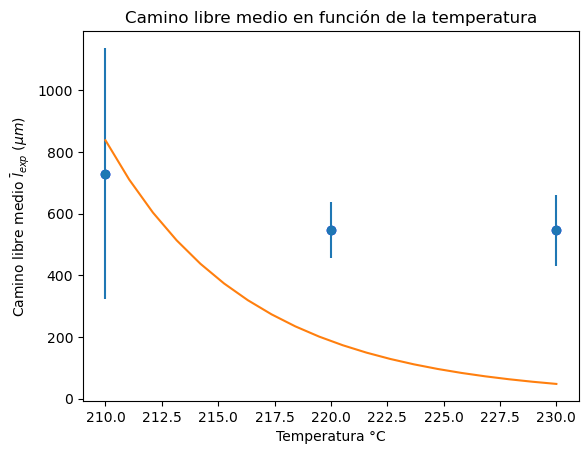

In [138]:

# Calculo del camino libre medio 
Ea = 4.67 # Ojito preguntar si es esto o si se debe hacer con el calculado en la gráfica
L = 12/100
lambda_210 =(L/(2*Ea_210)) *sol210[0]
lambda_220 =  (L/(2*Ea_220)) *sol220[0]
lambda_230 = (L/(2*Ea_230)) *sol230[0]
print(lambda_210)

TArray = np.array([210,220,230])
error_lambda_210 = (L/(2*Ea))*errores210[0]
error_lambda_220 = (L/(2*Ea)) *errores220[0]
error_lambda_230 = (L/(2*Ea))*errores230[0]

lambdaErroresArray = np.array([error_lambda_210,error_lambda_220,error_lambda_230])/10**(-6)
print(errores210[0],errores220[0],errores230[0])
lambdaArray = np.array([lambda_210,lambda_220,lambda_230])/10**(-6)
print("Los valores para el camnio libre medio", lambdaArray, "Con errores", lambdaErroresArray)

fig, ex = plt.subplots()

t_lambda = ex.scatter(TArray,lambdaArray,c = 'blue' )
ex.errorbar(TArray,lambdaArray, yerr=lambdaErroresArray, fmt='o')



ex.set_title('Camino libre medio en función de la temperatura')
plt.ylabel(r'Camino libre medio '+r'$\bar{l}_{exp}$'+' '+r'$\left ( \mu m \right )$')
plt.xlabel('Temperatura °C')




def MeanPathFit(x, m): 
    pressure = 8.7*10**(9-(3110/x))

    return (m*x)/pressure



p0 = np.array([210,0.0007])

solMean,covMean= curve_fit(MeanPathFit,TArray,lambdaArray)

errores = np.sqrt(np.diag(covMean))
#print(cov[0])

m = solMean[0]

delta_m = covMean[0][0]

print(solMean, errores)
T = np.linspace(210,230,20)
ex.plot( T, MeanPathFit(T,solMean))
kb = 1.3807*10**(-23)
crossSection = m/kb

print(crossSection)
plt.show()


In [136]:

work_210 = 30.86- Ea_210
errorEa_210 = ((Ea_210*errores210[0])**(2)+(errores210[1])**(2))**(1/2)
work_220 = 30.86- Ea_220
errorEa_220 = ((Ea_220*errores220[0])**(2)+(errores220[1])**(2))**(1/2)
work_230 = 25.47-Ea_230
errorEa_230 = ((Ea_230*errores230[0])**(2)+(errores230[1])**(2))**(1/2)

meanError = ((1/3*errorEa_210)**2+(1/3*errorEa_220)**2+(1/3*errorEa_230)**2)**(1/2)
print(work_210,errorEa_210)
print(work_220,errorEa_210)
print(work_230,errorEa_210)
print(round((work_210+work_220+work_230)/3,2),round(meanError,2))


26.37328573363864 0.20902055412381113
26.124107137931137 0.20902055412381113
20.83607141966688 0.20902055412381113
24.44 0.07
